# Advanced Econometrics (JEM217)– Home Assignment 3 (WS 2025)



**Authors: Sebastian Pasz, Vojtěch Dohnal, Tomáš Gabriel**

**AI Usage**

ChatGPT-5 was used during the preparation of this assignment **solely for grammatical editing and minor code optimization**.  
Any sections where AI-assisted code optimization was applied are explicitly indicated within the notebook.

## Initial Preparation

In this section, we install and load all required R packages necessary for data simulation, estimation, and visualization.  
We also set a fixed random seed (`set.seed(123)`) to ensure that all simulated results are fully reproducible.


In [3]:

req_pkgs <- c("ggplot2","dplyr","quantreg","lmtest","sandwich","car","stargazer","knitr","glm2","gmm","msm","plm","modelsummary")
for (p in req_pkgs) {
  if (!requireNamespace(p, quietly = TRUE)) {
    install.packages(p, repos = "https://cloud.r-project.org")
  }
}
library(ggplot2)
library(dplyr)
library(quantreg)
library(lmtest)
library(sandwich)
library(car)
library(stargazer)
library(knitr)
library(glm2)
library(gmm)
library(msm)
library(plm)
library(modelsummary)

set.seed(123) 


Warning message:
"package 'dplyr' was built under R version 4.4.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'quantreg' was built under R version 4.4.3"
Loading required package: SparseM

Warning message:
"package 'SparseM' was built under R version 4.4.3"
Warning message:
"package 'lmtest' was built under R version 4.4.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.4.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'sandwich' was built under R version 4.4.3"
Warning message:
"package 'car' was built under R version 4.4.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.4.3"

Attaching package: 'car'


The following

## Problem 1

In [4]:
options(scipen = 999)

set.seed(123)

In [5]:
n <- 500
alpha <- 5
beta <- 1.5
gamma <- 0.7

x <- rnorm(n, mean = 20, sd = sqrt(36))
eps <- rnorm(n, mean = 0, sd = sqrt(x^(2*gamma)))
y <- alpha + beta * x + eps

data <- data.frame(y, x)

### (a)


Call:
lm(formula = y ~ x, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.8464  -5.3117   0.0167   5.1369  28.9488 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  6.69650    1.37797    4.86           0.00000158 ***
x            1.41103    0.06552   21.54 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.542 on 498 degrees of freedom
Multiple R-squared:  0.4822,	Adjusted R-squared:  0.4812 
F-statistic: 463.8 on 1 and 498 DF,  p-value: < 0.00000000000000022


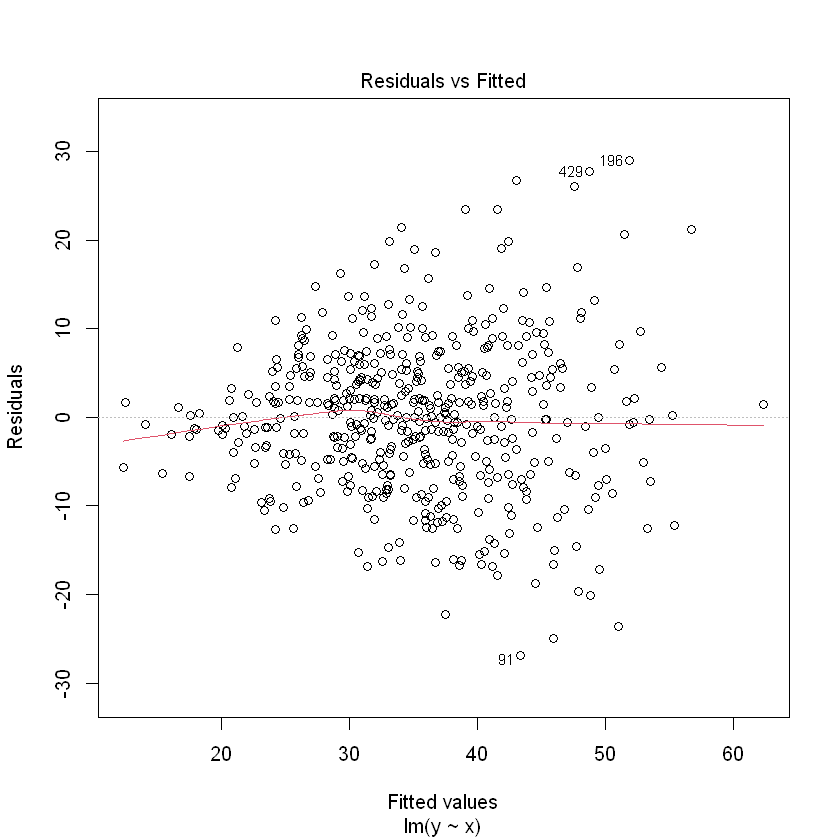

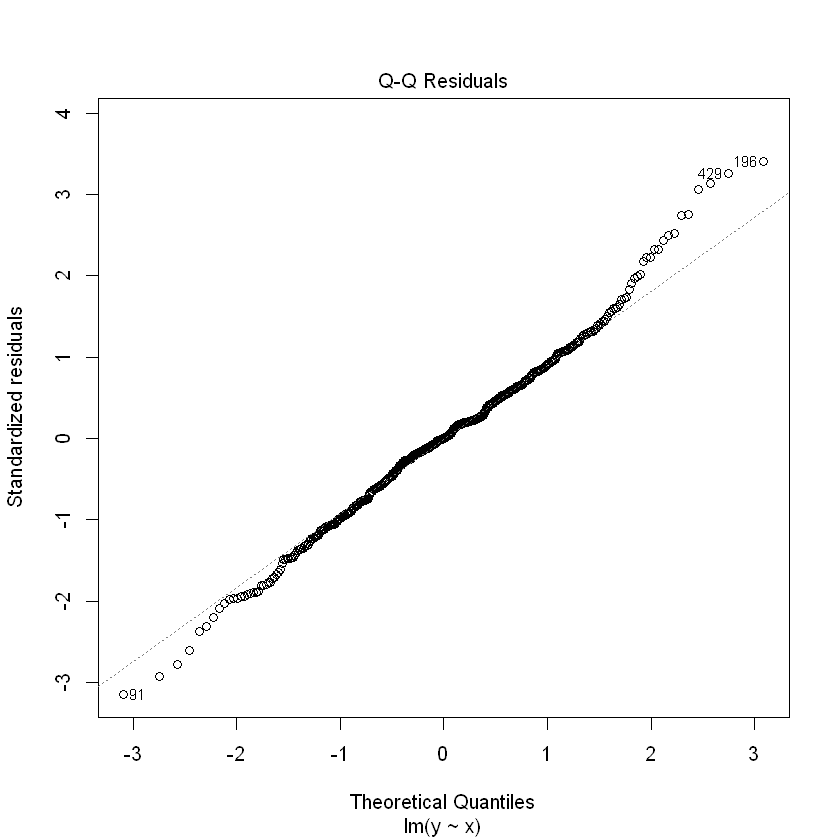

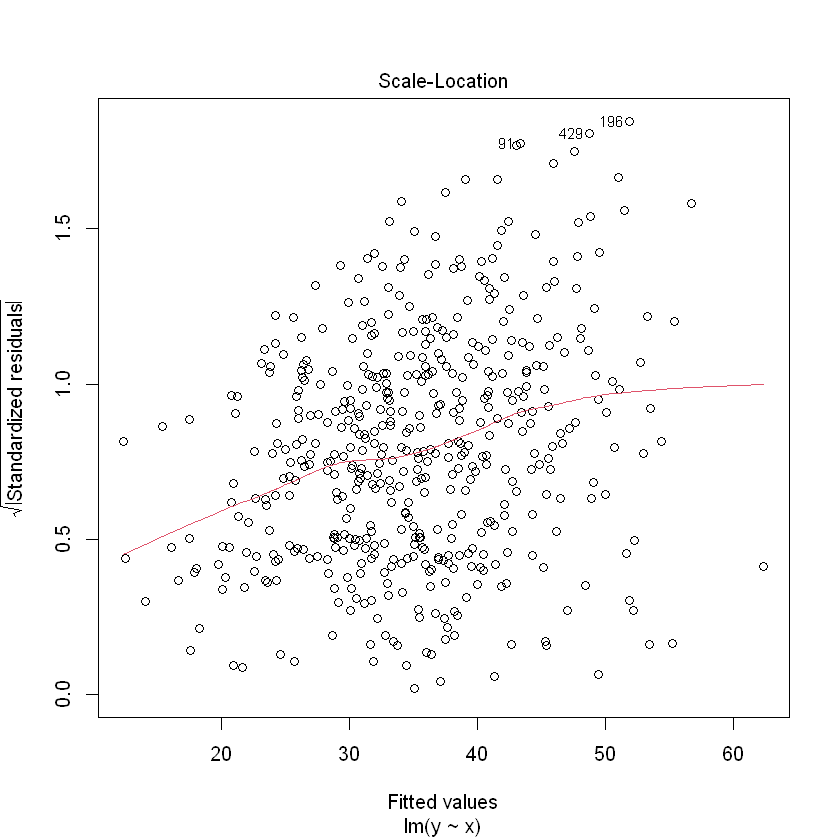


	studentized Breusch-Pagan test

data:  ols
BP = 42.607, df = 1, p-value = 0.00000000006691


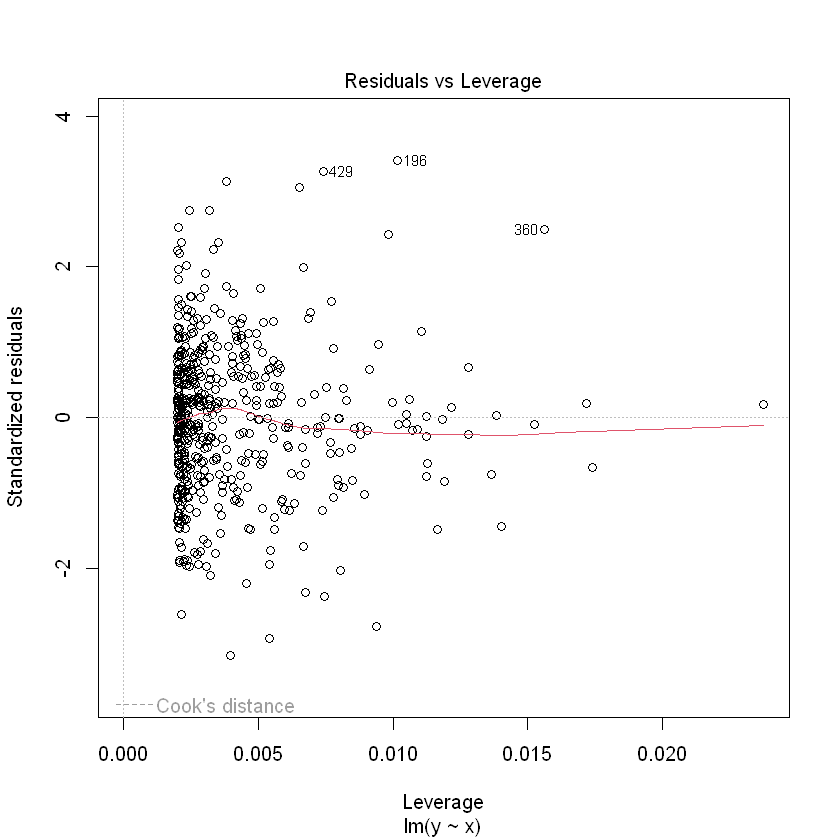

In [7]:
## White background (R base)
par(bg = "white")


ols <- lm(y ~ x, data = data)
summary(ols)
plot(ols)

bptest(ols)

The beta coefficient is highly statistically significant with value 1.41 which is pretty close to the true value. The model also seems to explain significant proportion of the variation in y with adjusted R^2 0.4812 which is not surprising but not majority probably because of the heteroskedasticity issue mentioned next. Based on the setup the OLS estimates are unbiased and consistent but not efficient because the variation of the errors is heteroskedastic which we positively tested using the Breusch-Pagan test for heteroskedasticity (the null hypothesis of homoskedasticity was strongly rejected).

### (b)


Call:
lm(formula = y ~ x, data = data, weights = w)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-2.78475 -0.67309  0.01215  0.65630  2.70938 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  5.53076    0.97788   5.656         0.0000000262 ***
x            1.47014    0.05358  27.436 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.012 on 498 degrees of freedom
Multiple R-squared:  0.6018,	Adjusted R-squared:  0.601 
F-statistic: 752.8 on 1 and 498 DF,  p-value: < 0.00000000000000022


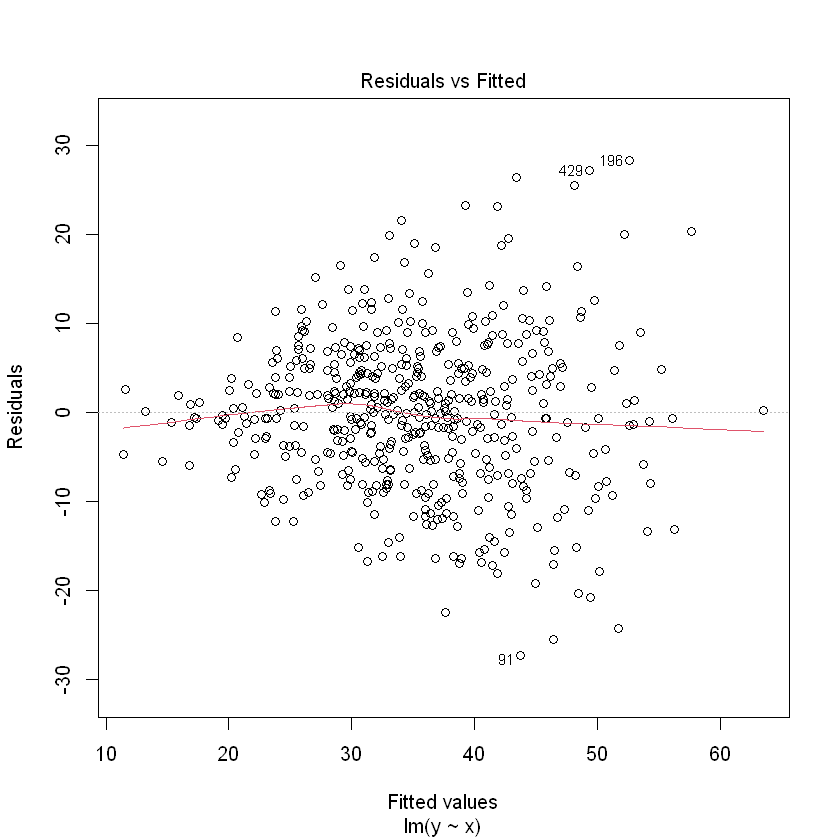

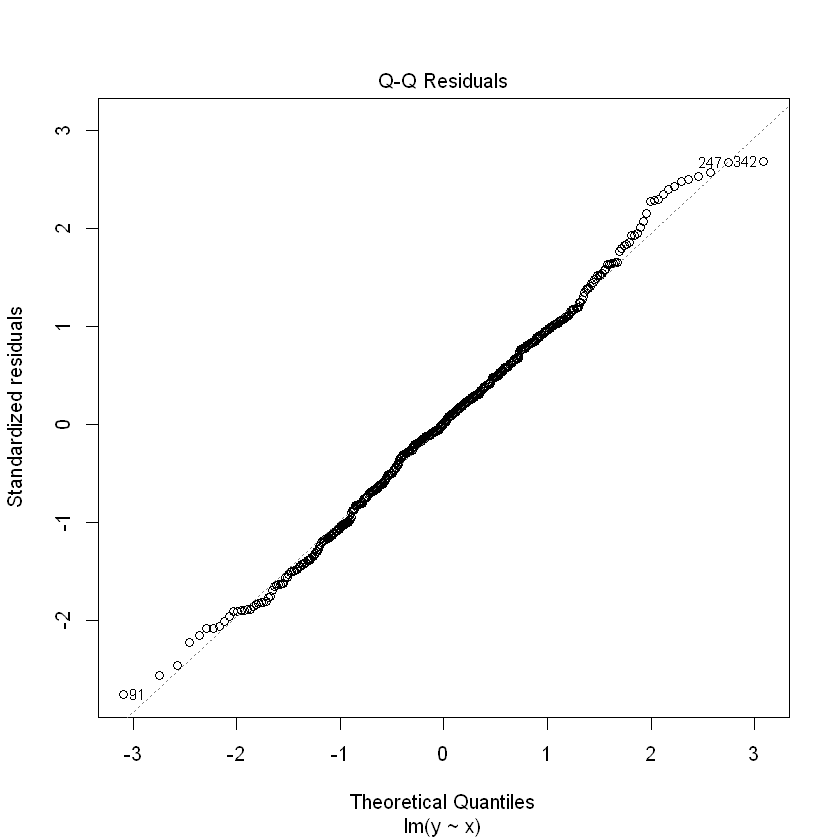

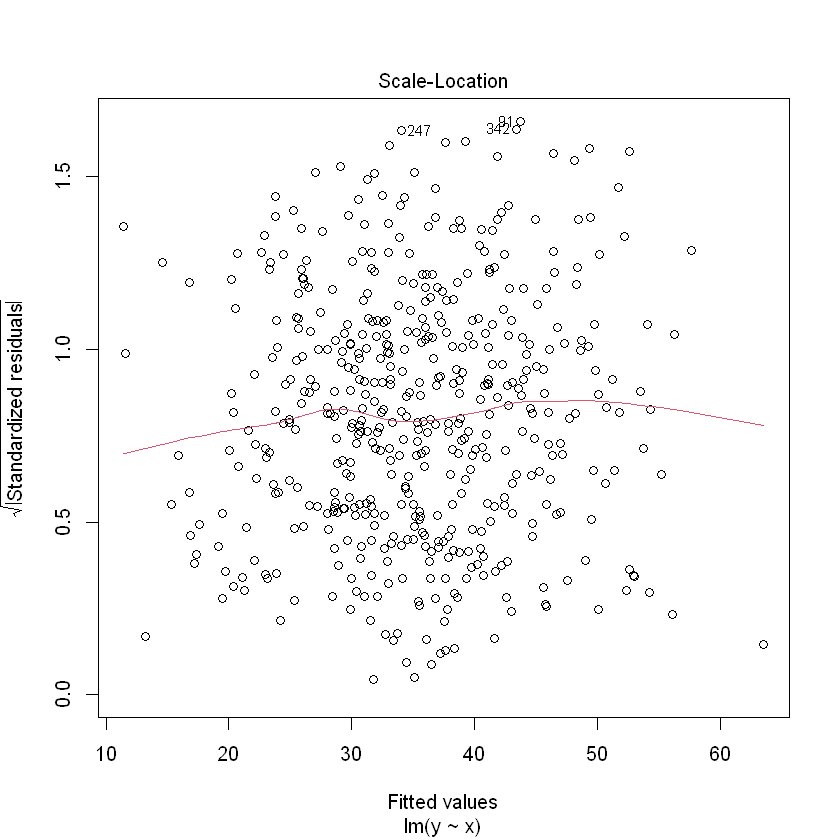

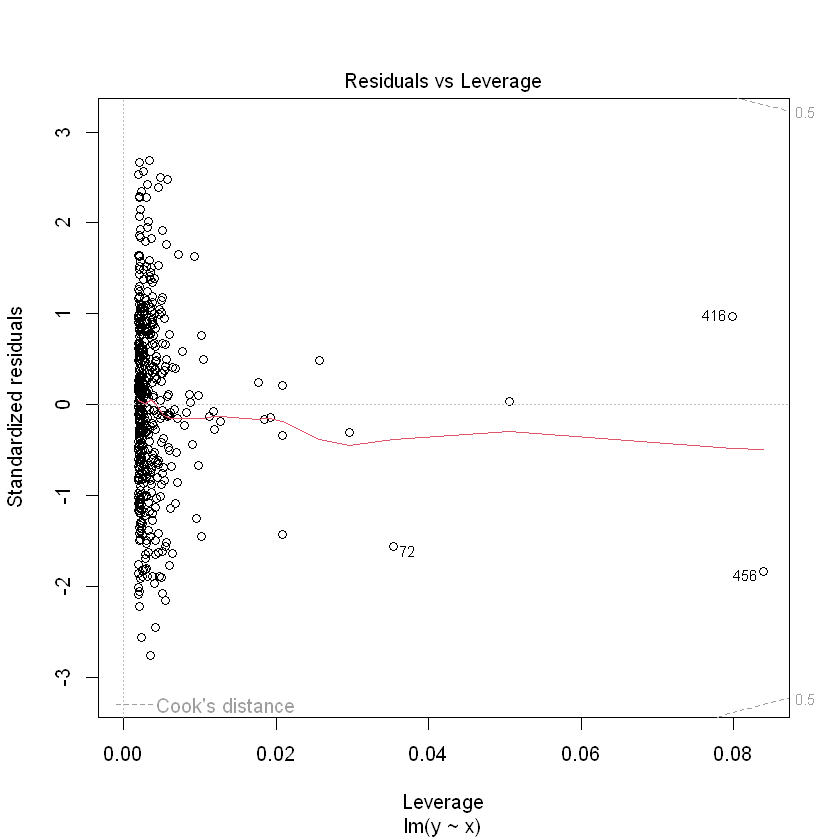

In [9]:
## White background (R base)
par(bg = "white")

w <- 1 / x^(2 * gamma)
gls <- lm(y ~ x, weights = w, data = data)
summary(gls)
plot(gls)

The weighting matrix P is in form P′P = Ω^(-1), where Ω^(-1)=diag(x1^(-2γ),...,xn^(-2γ)). We can see that the results improved quite a lot while keeping significance. Importantly, the true values now fall into the confidence intervals. Overall, the GLs provides better results in our situation because it accounts for the heteroskedasticity problem. 

### (c)

We estimated FGLS model for heteroscedasticity of the form σi^2 = h(xi):

In [10]:
ehatsq <- resid(ols)^2 
sighatsq <- lm(log(ehatsq) ~ log(x), data = data) 
w <- exp(fitted(sighatsq)) 
fgls <- lm(y ~ x, weights = 1 / w, data = data) 
summary(fgls)


Call:
lm(formula = y ~ x, data = data, weights = 1/w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-5.4722 -1.3207  0.0243  1.2865  5.3256 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  5.54176    0.98103   5.649         0.0000000272 ***
x            1.46954    0.05368  27.374 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.985 on 498 degrees of freedom
Multiple R-squared:  0.6008,	Adjusted R-squared:    0.6 
F-statistic: 749.3 on 1 and 498 DF,  p-value: < 0.00000000000000022


### (d)

We get the standard errors using White heteroscedasticity consistent estimator as follows:

In [12]:
cov <- vcovHC(ols, type = 'HC2')
olsHC <- coeftest(ols, vcov. = cov)

In [13]:
errors <- matrix(ncol = 2, nrow = 4)
rownames(errors) <- c('OLS','Hetero-robust', 'GLS', 'FGLS')
colnames(errors) <- c('Alfa se', 'Beta se')

errors[1, ] <- summary(ols)$coefficients[, 2]
errors[2, ] <- olsHC[, "Std. Error"]
errors[3, ] <- summary(gls)$coefficients[, 2]
errors[4, ] <- summary(fgls)$coefficients[, 2]
errors

,Alfa se,Beta se
OLS,1.3779678,0.06551785
Hetero-robust,1.2815684,0.06960340
GLS,0.9778760,0.05358344
FGLS,0.9810274,0.05368347


Comparing all the standard errors we can clearly see, that in our case the GLS se are the lowest i.e. GLS is the most efficient est out of those we tried. Although, the FGLS se are not are not that far. This could be explain by the fact, that both of these estimators inherently account for the heteroskedasticity problem. And the GLS performs better due to the fact that it uses the true Ω.

## Problem 2.

First we download the dataset and analyze the original results of Arellano and Bond (1991). Then we check inital Fixed and Random Effects models to better understand the inference.

In [14]:
### Original results of Arellano and Bond (1991)
data("EmplUK")
emp.gmm <- pgmm(
log(emp) ~ lag(log(emp), 1:2) + lag(log(wage), 0:1) + log(capital) +
lag(log(output), 0:1) | lag(log(emp), 2:99),
data = EmplUK, effect = "twoways", model = "twosteps"
)
summary(emp.gmm, robust = FALSE)

EmplUKp <- pdata.frame(EmplUK, index = c("firm", "year"))

FE <- plm(
  log(emp) ~ lag(log(wage), 0:1) + log(capital) + lag(log(output), 0:1),
  data   = EmplUKp,
  model  = "within",
  effect = "individual"   # firm fixed effects
)

summary(FE)

RE <- plm(
  log(emp) ~ lag(log(wage), 0:1) + log(capital) + lag(log(output), 0:1),
  data   = EmplUKp,
  model  = "random",
  effect = "individual"   # firm fixed effects
)

summary(RE)


pdim(EmplUKp)   # structure: n, T, unbalancedness

EmplUKp$log_emp    <- log(EmplUKp$emp)
EmplUKp$log_wage   <- log(EmplUKp$wage)
EmplUKp$log_capital<- log(EmplUKp$capital)
EmplUKp$log_output <- log(EmplUKp$output)

Twoways effects Two-steps model Difference GMM 

Call:
pgmm(formula = log(emp) ~ lag(log(emp), 1:2) + lag(log(wage), 
    0:1) + log(capital) + lag(log(output), 0:1) | lag(log(emp), 
    2:99), data = EmplUK, effect = "twoways", model = "twosteps")

Unbalanced Panel: n = 140, T = 7-9, N = 1031

Number of Observations Used: 611
Residuals:
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.6190677 -0.0255683  0.0000000 -0.0001339  0.0332013  0.6410272 

Coefficients:
                        Estimate Std. Error  z-value              Pr(>|z|)    
lag(log(emp), 1:2)1     0.474151   0.085303   5.5584    0.0000000272221654 ***
lag(log(emp), 1:2)2    -0.052967   0.027284  -1.9413             0.0522200 .  
lag(log(wage), 0:1)0   -0.513205   0.049345 -10.4003 < 0.00000000000000022 ***
lag(log(wage), 0:1)1    0.224640   0.080063   2.8058             0.0050192 ** 
log(capital)            0.292723   0.039463   7.4177    0.0000000000001191 ***
lag(log(output), 0:1)0  0.609775   0.

Oneway (individual) effect Within Model

Call:
plm(formula = log(emp) ~ lag(log(wage), 0:1) + log(capital) + 
    lag(log(output), 0:1), data = EmplUKp, effect = "individual", 
    model = "within")

Unbalanced Panel: n = 140, T = 6-8, N = 891

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.4988098 -0.0680434  0.0019928  0.0699134  0.4752333 

Coefficients:
                        Estimate Std. Error t-value              Pr(>|t|)    
lag(log(wage), 0:1)0   -0.534946   0.064348 -8.3133 0.0000000000000004395 ***
lag(log(wage), 0:1)1    0.059360   0.060046  0.9886                0.3232    
log(capital)            0.557570   0.024931 22.3645 < 0.00000000000000022 ***
lag(log(output), 0:1)0  0.508685   0.090605  5.6143 0.0000000278409829863 ***
lag(log(output), 0:1)1 -0.097916   0.104054 -0.9410                0.3470    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    32.324
Residual Sum of Squares: 11.545
R-Squared:      0

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = log(emp) ~ lag(log(wage), 0:1) + log(capital) + 
    lag(log(output), 0:1), data = EmplUKp, effect = "individual", 
    model = "random")

Unbalanced Panel: n = 140, T = 6-8, N = 891

Effects:
                  var std.dev share
idiosyncratic 0.01548 0.12440  0.06
individual    0.24332 0.49327  0.94
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8976  0.8976  0.8976  0.9007  0.9051  0.9112 

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.59457 -0.07312  0.01035 -0.00085  0.08610  0.44470 

Coefficients:
                        Estimate Std. Error z-value              Pr(>|z|)    
(Intercept)             1.596842   0.411283  3.8826             0.0001033 ***
lag(log(wage), 0:1)0   -0.527980   0.065112 -8.1088 0.0000000000000005112 ***
lag(log(wage), 0:1)1    0.088598   0.060964  1.4533             0.1461438    
log(capital)            0.671975   0.01917

Unbalanced Panel: n = 140, T = 7-9, N = 1031

### (a) and (b)


Variance decomposition shows that almost all variation in log employment is driven by persistent firm-specific effects rather than within-firm time variation. Approximately 98\% of the total variance is between firms, while only about 2\% is within firms over time. Graphical evidence further indicates common time shocks affecting all firms. This strongly motivates the use of fixed-effects or dynamic panel estimators rather than pooled OLS.

total sum of squares: 1853.629 
        id       time 
0.97896106 0.02284041 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.2634  0.1659  0.8272  1.0560  1.9488  4.6873 

Var(log_emp): 1.79964 
Between (firm means): 1.761777 
Within (deviations): 0.0378625 
Var(log_emp): 1.79964 
Between (firm means): 1.761777 
Within (deviations): 0.0378625 


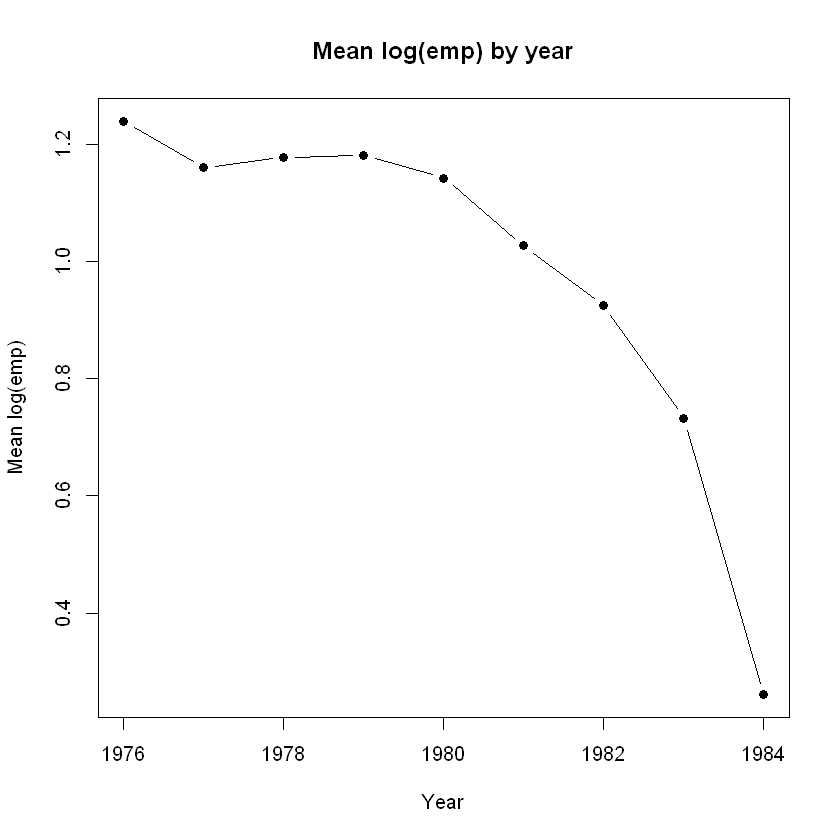

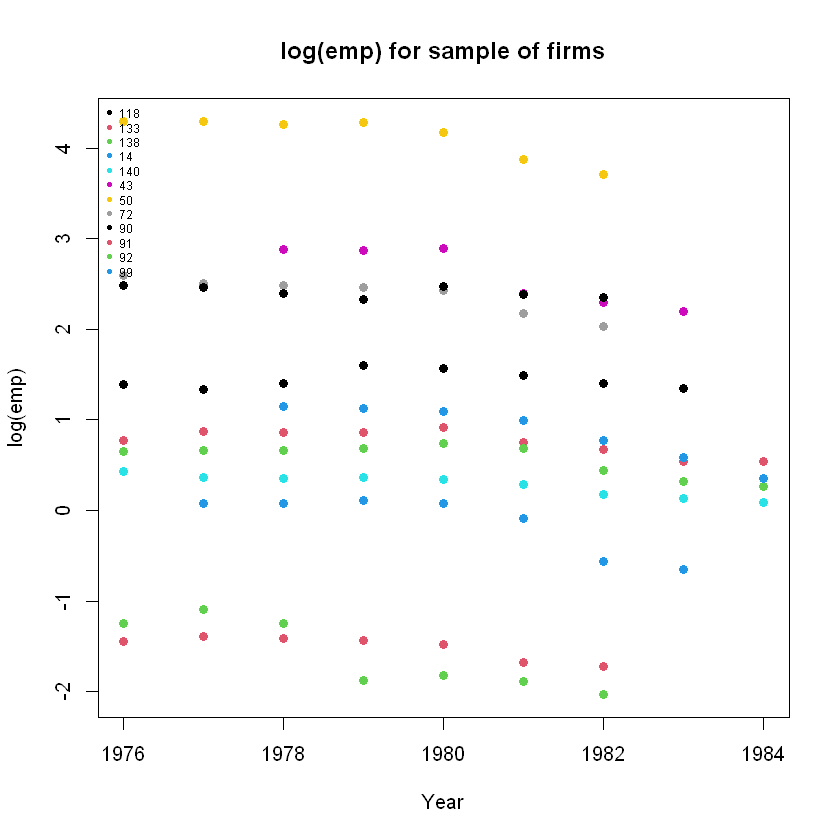

In [15]:
summary(EmplUKp$log_emp)

bw <- data.frame(
  firm    = index(EmplUKp)$firm,
  year    = index(EmplUKp)$year,
  log_emp = EmplUKp$log_emp
)

firm_mean <- ave(bw$log_emp, bw$firm, FUN = mean, na.rm = TRUE)
bw$within_dev <- bw$log_emp - firm_mean

cat("Var(log_emp):", var(bw$log_emp, na.rm = TRUE), "\n")
cat("Between (firm means):", var(firm_mean, na.rm = TRUE), "\n")
cat("Within (deviations):", var(bw$within_dev, na.rm = TRUE), "\n")

avg_by_year <- tapply(EmplUKp$log_emp, index(EmplUKp)$year, mean, na.rm = TRUE)
years <- as.numeric(names(avg_by_year))

## White background (R base)
par(bg = "white")

## For debugging
stopifnot("log_emp" %in% names(EmplUKp))

idx <- index(EmplUKp)

bw <- data.frame(
  firm    = as.character(idx$firm),
  year    = as.numeric(as.character(idx$year)),
  log_emp = as.numeric(EmplUKp$log_emp)
)

## Firm means / within deviations
firm_mean <- ave(bw$log_emp, bw$firm, FUN = function(x) mean(x, na.rm = TRUE))
bw$within_dev <- bw$log_emp - firm_mean

cat("Var(log_emp):", var(bw$log_emp, na.rm = TRUE), "\n")
cat("Between (firm means):", var(firm_mean, na.rm = TRUE), "\n")
cat("Within (deviations):", var(bw$within_dev, na.rm = TRUE), "\n")

## Mean log(emp) by year
avg_by_year <- tapply(bw$log_emp, bw$year, mean, na.rm = TRUE)
years <- as.numeric(names(avg_by_year))

plot(
  years, as.numeric(avg_by_year),
  type = "b",
  col  = "black",
  pch  = 16,
  xlab = "Year",
  ylab = "Mean log(emp)",
  main = "Mean log(emp) by year"
)

## Spaghetti plot for sample firms
set.seed(123)
sample_firms <- sample(unique(bw$firm), 12)

tmp <- bw[bw$firm %in% sample_firms, ]
tmp <- tmp[order(tmp$firm, tmp$year), ]

plot(
  tmp$year, tmp$log_emp,
  col  = as.numeric(factor(tmp$firm)),
  pch  = 16,
  xlab = "Year",
  ylab = "log(emp)",
  main = "log(emp) for sample of firms"
)

legend(
  "topleft",
  legend = levels(factor(tmp$firm)),
  col    = seq_along(levels(factor(tmp$firm))),
  pch    = 16,
  cex    = 0.6,
  bty    = "n"
)

### (b) and (c)

From the test results below we can se that FE model is the preffered choice even with the twoway specification. All test including Hausman favor FE models, thus FE is prefferd choice.

In [16]:
# --- Model specification (static) ---
form_static <- log_emp ~ lag(log_wage, 0:1) + log_capital + lag(log_output, 0:1)

POOL <- plm(form_static, data = EmplUKp, model = "pooling")
FE_i <- plm(form_static, data = EmplUKp, model = "within", effect = "individual")
RE_i <- plm(form_static, data = EmplUKp, model = "random", effect = "individual")

summary(POOL)
summary(FE_i)
summary(RE_i)

# --- Necessary tests for model choice ---
# 1) Pooling vs FE: is there firm heterogeneity requiring FE?
pFtest(FE_i, POOL)

# 2) Pooling vs RE: LM test for random effects
plmtest(POOL, type = "bp")     # Breusch-Pagan LM

# 3) FE vs RE: Hausman test (correlation between effects and regressors)
phtest(FE_i, RE_i)

# two ways FE pFtest - just to be sure
FE_tw <- plm(form_static, data = EmplUKp, model = "within", effect = "twoways")
summary(FE_tw)

# Test whether time fixed effects are jointly needed:
# Compare twoways FE vs individual FE (nested via time dummies)
pFtest(FE_tw, FE_i)

Pooling Model

Call:
plm(formula = form_static, data = EmplUKp, model = "pooling")

Unbalanced Panel: n = 140, T = 6-8, N = 891

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-1.943627 -0.265990  0.074705  0.364025  1.751129 

Coefficients:
                       Estimate Std. Error t-value              Pr(>|t|)    
(Intercept)            0.491906   1.014279  0.4850              0.627809    
lag(log_wage, 0:1)0   -0.293828   0.218380 -1.3455              0.178811    
lag(log_wage, 0:1)1   -0.115332   0.213976 -0.5390              0.590025    
log_capital            0.805849   0.012005 67.1277 < 0.00000000000000022 ***
lag(log_output, 0:1)0 -0.713737   0.371672 -1.9203              0.055136 .  
lag(log_output, 0:1)1  1.181919   0.366757  3.2226              0.001317 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    1601
Residual Sum of Squares: 259.81
R-Squared:      0.83772
Adj. R-Squared: 0.83681
F-statistic: 913.732 on 5 

Oneway (individual) effect Within Model

Call:
plm(formula = form_static, data = EmplUKp, effect = "individual", 
    model = "within")

Unbalanced Panel: n = 140, T = 6-8, N = 891

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.4988098 -0.0680434  0.0019928  0.0699134  0.4752333 

Coefficients:
                       Estimate Std. Error t-value              Pr(>|t|)    
lag(log_wage, 0:1)0   -0.534946   0.064348 -8.3133 0.0000000000000004395 ***
lag(log_wage, 0:1)1    0.059360   0.060046  0.9886                0.3232    
log_capital            0.557570   0.024931 22.3645 < 0.00000000000000022 ***
lag(log_output, 0:1)0  0.508685   0.090605  5.6143 0.0000000278409829863 ***
lag(log_output, 0:1)1 -0.097916   0.104054 -0.9410                0.3470    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    32.324
Residual Sum of Squares: 11.545
R-Squared:      0.64282
Adj. R-Squared: 0.57388
F-statistic: 268.519 on 5 and 746 DF, 

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = form_static, data = EmplUKp, effect = "individual", 
    model = "random")

Unbalanced Panel: n = 140, T = 6-8, N = 891

Effects:
                  var std.dev share
idiosyncratic 0.01548 0.12440  0.06
individual    0.24332 0.49327  0.94
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8976  0.8976  0.8976  0.9007  0.9051  0.9112 

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.59457 -0.07312  0.01035 -0.00085  0.08610  0.44470 

Coefficients:
                       Estimate Std. Error z-value              Pr(>|z|)    
(Intercept)            1.596842   0.411283  3.8826             0.0001033 ***
lag(log_wage, 0:1)0   -0.527980   0.065112 -8.1088 0.0000000000000005112 ***
lag(log_wage, 0:1)1    0.088598   0.060964  1.4533             0.1461438    
log_capital            0.671975   0.019178 35.0381 < 0.00000000000000022 ***
lag(log_output, 0:1)0  0.460501 


	F test for individual effects

data:  form_static
F = 115.41, df1 = 139, df2 = 746, p-value < 0.00000000000000022
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan)

data:  form_static
chisq = 2203.3, df = 1, p-value < 0.00000000000000022
alternative hypothesis: significant effects



	Hausman Test

data:  form_static
chisq = 50.997, df = 5, p-value = 0.0000000008663
alternative hypothesis: one model is inconsistent


Twoways effects Within Model

Call:
plm(formula = form_static, data = EmplUKp, effect = "twoways", 
    model = "within")

Unbalanced Panel: n = 140, T = 6-8, N = 891

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.4852085 -0.0672569  0.0046941  0.0704955  0.4431377 

Coefficients:
                       Estimate Std. Error t-value              Pr(>|t|)    
lag(log_wage, 0:1)0   -0.465485   0.067784 -6.8672      0.00000000001389 ***
lag(log_wage, 0:1)1    0.025558   0.065396  0.3908               0.69604    
log_capital            0.552477   0.025303 21.8344 < 0.00000000000000022 ***
lag(log_output, 0:1)0  0.351135   0.149970  2.3414               0.01948 *  
lag(log_output, 0:1)1 -0.129716   0.151287 -0.8574               0.39149    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    20.466
Residual Sum of Squares: 11.309
R-Squared:      0.44741
Adj. R-Squared: 0.3345
F-statistic: 119.667 on 5 and 739 DF, p-value: < 0.00


	F test for twoways effects

data:  form_static
F = 2.2036, df1 = 7, df2 = 739, p-value = 0.03213
alternative hypothesis: significant effects


### (d)

Below we present table of all previous estimates for comparison.
The static two-way FE model is a valid benchmark controlling for firm and time heterogeneity, but it ignores strong employment persistence. The Arellano–Bond GMM results indicate substantial dynamic adjustment (lagged employment strongly significant) and lead to noticeably different magnitudes for capital and output effects. Therefore, differences between static FE/RE and AB are expected and reflect both dynamics and endogeneity correction rather than mere sampling noise.

In [17]:
models <- list(
  "Pooled OLS"         = POOL,
  "FE (individual)"    = FE_i,
  "RE (individual)"    = RE_i,
  "FE (two-ways)"      = FE_tw,
  "Arellano–Bond GMM"  = emp.gmm
)

coef_map_exact <- c(
  "(Intercept)"             = "Intercept",

  # plm terms
  "lag(log_wage, 0:1)0"     = "log(wage)$_t$",
  "lag(log_wage, 0:1)1"     = "log(wage)$_{t-1}$",
  "log_capital"             = "log(capital)",
  "lag(log_output, 0:1)0"   = "log(output)$_t$",
  "lag(log_output, 0:1)1"   = "log(output)$_{t-1}$",

  # pgmm terms
  "lag(log(wage), 0:1)0"    = "log(wage)$_t$",
  "lag(log(wage), 0:1)1"    = "log(wage)$_{t-1}$",
  "log(capital)"            = "log(capital)",
  "lag(log(output), 0:1)0"  = "log(output)$_t$",
  "lag(log(output), 0:1)1"  = "log(output)$_{t-1}$",

  # AB employment lags
  "lag(log(emp), 1:2)1"     = "log(emp)$_{t-1}$",
  "lag(log(emp), 1:2)2"     = "log(emp)$_{t-2}$"
)

modelsummary(
  models,
  stars = TRUE,
  statistic = "std.error",
  gof_omit = "IC|Log|RMSE|R2|Adj|Within|Between|Overall|DF",
  coef_omit = "^(1979|1980|1981|1982|1983|1984)$",
  coef_map = coef_map_exact,
  title = "Employment equations: static and dynamic panel estimators"
)

Registered S3 method overwritten by 'broom':
  method    from
  nobs.felm lfe 

Warning message:
"`modelsummary could not extract goodness-of-fit statistics from a model
of class "pgmm". The package tried a sequence of 2 helper functions:

performance::model_performance(model)
broom::glance(model)

One of these functions must return a one-row `data.frame`. The `modelsummary` website explains how to summarize unsupported models or add support for new models yourself:

https://modelsummary.com/vignettes/modelsummary.html"



+---------------------+------------+-----------------+-----------------+---------------+-------------------+
|                     | Pooled OLS | FE (individual) | RE (individual) | FE (two-ways) | Arellano–Bond GMM |
+=====================+============+=================+=================+===============+===================+
| Intercept           | 0.492      |                 | 1.597***        |               |                   |
+---------------------+------------+-----------------+-----------------+---------------+-------------------+
|                     | (1.014)    |                 | (0.411)         |               |                   |
+---------------------+------------+-----------------+-----------------+---------------+-------------------+
| log(wage)$_t$       | -0.294     | -0.535***       | -0.528***       | -0.465***     | -0.513***         |
+---------------------+------------+-----------------+-----------------+---------------+-------------------+
|                 

## Problem 3

We estimate
$$
\ln(wage_i) = \beta_0 + \beta_1 ed_i + \beta_2 smsa_i + \beta_3 south_i + u_i
$$
on the $t = 2$ cross-section and test for group-specific heteroskedasticity with respect to $south_i$. Under this variance structure, we construct a FGLS estimator.

### OLS Estimation

The model is first estimated by OLS. Since $south_i$ is a group indicator, we allow for
$$
\operatorname{Var}(u_i \mid south_i = 0) \neq \operatorname{Var}(u_i \mid south_i = 1).
$$


In [15]:
# Data setup
library(plm)
library(lmtest)

data("Wages", package = "plm")

Wag <- pdata.frame(Wages, index = 595)
Wag$time_period <- as.numeric(index(Wag, "time"))

# Subset for time = 2
cs2 <- subset(Wag, time_period == 2)
cs2 <- as.data.frame(cs2)

# OLS
ols_model <- lm(lwage ~ ed + smsa + south, data = cs2)
summary(ols_model)


Call:
lm(formula = lwage ~ ed + smsa + south, data = cs2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26261 -0.18665  0.03901  0.20941  0.72538 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.796547   0.063885  90.734  < 2e-16 ***
ed           0.046906   0.004793   9.786  < 2e-16 ***
smsayes      0.149297   0.028410   5.255 2.07e-07 ***
southyes    -0.114475   0.029018  -3.945 8.94e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3176 on 591 degrees of freedom
Multiple R-squared:  0.2369,	Adjusted R-squared:  0.2331 
F-statistic: 61.17 on 3 and 591 DF,  p-value: < 2.2e-16


### Test for group-specific heteroskedasticity

To assess whether the error variance differs across groups defined by the indicator variable $south_i$, we use OLS residuals and compare the estimated variances for individuals living in the South and outside the South. The equality of variances is tested using an F-test based on the ratio of the group-specific residual variances.

As a complementary regression-based approach, we also apply the Breusch–Pagan test with $south_i$ as the variance-driving variable. Rejection of the null hypothesis indicates heteroskedasticity related to the SOUTH indicator.

In [ ]:
# Setup data and residuals
cs2$resid <- residuals(ols_model)
k <- length(coef(ols_model))

# Groups (south yes/no)
is_south <- cs2$south == "yes"
is_other <- cs2$south == "no"

# Calculate degrees of freedom
df_south <- sum(is_south) - k
df_other <- sum(is_other) - k

stopifnot(df_south > 0, df_other > 0)

# Variances
var_south <- sum(cs2$resid[is_south]^2) / df_south
var_other <- sum(cs2$resid[is_other]^2) / df_other

# F-test
f_stat <- var_south / var_other
p_val <- 2 * min(pf(f_stat, df_south, df_other), 
                 1 - pf(f_stat, df_south, df_other))
p_val <- min(max(p_val, 0), 1)

cat("\n--- Heteroskedasticity Test Results ---\n")
cat("Variance (South):    ", var_south, "\n")
cat("Variance (Non-South):", var_other, "\n")
cat("F-statistic:         ", f_stat, "\n")
cat("P-value:             ", p_val, "\n")

# Breusch-Pagan test
print(bptest(ols_model, ~ south, data = cs2))


--- Heteroskedasticity Test Results ---
Variance (South):     0.1218194 
Variance (Non-South): 0.09332768 
F-statistic:          1.305287 
P-value:              0.03374653 

	studentized Breusch-Pagan test

data:  ols_model
BP = 3.5261, df = 1, p-value = 0.06041



### FGLS Estimation

To account for the heteroskedasticity related to the SOUTH indicator and obtain more efficient estimates under a two-group variance structure, we implement FGLS using WLS. Specifically, we estimate group-specific error variances from the OLS residuals separately for $south = yes$ and $south = no$, and use inverse-variance weights
$$
w_i = \frac{1}{\hat{\sigma}^2_{g(i)}},
$$
where $g(i) \in \{\text{South},\,\text{Non-South}\}$ denotes the group of observation $i$.

Intuitively, this procedure down-weights observations from the group with larger residual variance. In the $t = 2$ cross-section, the weighted regression confirms a positive and statistically significant return to education and a positive SMSA effect, while the coefficient on SOUTH is negative and statistically significant. Under the assumed two-variance structure, FGLS improves efficiency relative to OLS and yields inference that is appropriate for group-specific heteroskedasticity.


In [ ]:
cs2$weights <- ifelse(cs2$south == "yes", 1/var_south, 1/var_other)
fgls_model <- lm(lwage ~ ed + smsa + south, data = cs2, weights = weights)
print(summary(fgls_model))


Call:
lm(formula = lwage ~ ed + smsa + south, data = cs2, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-4.1316 -0.5704  0.1308  0.6862  2.3684 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.798215   0.063905  90.732  < 2e-16 ***
ed           0.046719   0.004783   9.769  < 2e-16 ***
smsayes      0.150399   0.028258   5.322 1.46e-07 ***
southyes    -0.114459   0.030633  -3.736 0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9966 on 591 degrees of freedom
Multiple R-squared:  0.2313,	Adjusted R-squared:  0.2274 
F-statistic: 59.28 on 3 and 591 DF,  p-value: < 2.2e-16

